Cyber Attack Analysis Project

Author: Vandana Kumari
Tools: Python, Pandas, NumPy, Matplotlib, Seaborn, Jupyter Notebook
Date: January 2026

Project Overview
This project analyzes real-world cybersecurity attack data to identify patterns, common attack types, targeted protocols, and anomaly trends. The goal is to generate insights that can help organizations improve their network security.

Objective
Perform data cleaning and preprocessing
Conduct exploratory data analysis (EDA)
Visualize key trends and distributions
Draw meaningful cybersecurity insights

#importing libraries 

In [1]:
import pandas as pd

# load dataset
df = pd.read_csv("updated_cybersecurity_attacks.csv")

# show first 5 rows
df.head()

,Unnamed: 0,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,...,Log Source,Browser,Device/OS,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,...,Server,Mozilla,Windows,2023,5,30,6,33,58,1
1,1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,...,Firewall,Mozilla,Windows,2020,8,26,7,8,30,2
2,2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,...,Firewall,Mozilla,Windows,2022,11,13,8,23,25,6
3,3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,...,Firewall,Mozilla,Macintosh,2023,7,2,10,38,46,6
4,4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,...,Firewall,Mozilla,Windows,2023,7,16,13,11,7,6


Data Cleaning

In [2]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Source IP Address',
       'Destination IP Address', 'Source Port', 'Destination Port', 'Protocol',
       'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'User Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Browser', 'Device/OS', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'DayOfWeek'],
      dtype='object')

In [3]:
df.describe()

,Unnamed: 0,Source Port,Destination Port,Packet Length,Anomaly Scores,Year,Month,Day,Hour,Minute,Second,DayOfWeek
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,32970.356450,33150.868650,781.452725,50.113473,2021.411375,6.288275,15.629550,11.507350,29.511825,29.591300,2.995750
std,11547.14972,18560.425604,18574.668842,416.044192,28.853598,1.085253,3.332979,8.771715,6.919122,17.360543,17.357387,2.004515
min,0.00000,1027.000000,1024.000000,64.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,16850.750000,17094.750000,420.000000,25.150000,2020.000000,3.000000,8.000000,5.000000,14.000000,14.000000,1.000000
50%,19999.50000,32856.000000,33004.500000,782.000000,50.345000,2021.000000,6.000000,16.000000,12.000000,29.000000,30.000000,3.000000
75%,29999.25000,48928.250000,49287.000000,1143.000000,75.030000,2022.000000,9.000000,23.000000,17.000000,45.000000,45.000000,5.000000
max,39999.00000,65530.000000,65535.000000,1500.000000,100.000000,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000


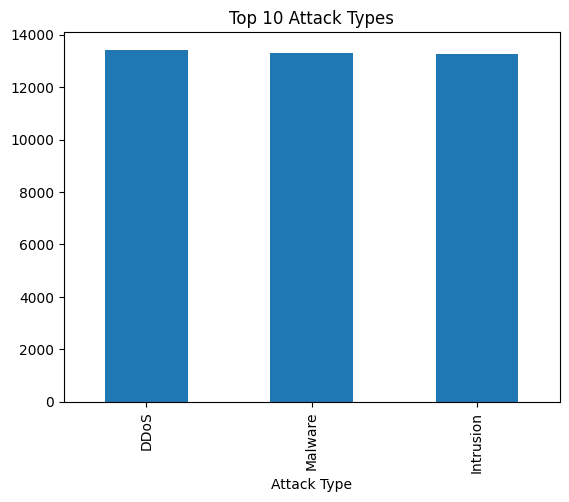

In [4]:
import matplotlib.pyplot as plt

df['Attack Type'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Attack Types")
plt.show()


In [5]:
df.shape

(40000, 34)

In [6]:
df.isnull().sum()

Unnamed: 0                0
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
Browser                   0
Device/OS                 0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
DayOfWeek                 0
dtype: int64

In [7]:
df = df.drop_duplicates()

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,unnamed:_0,timestamp,source_ip_address,destination_ip_address,source_port,destination_port,protocol,packet_length,packet_type,traffic_type,...,log_source,browser,device/os,year,month,day,hour,minute,second,dayofweek
0,0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,...,Server,Mozilla,Windows,2023,5,30,6,33,58,1
1,1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,...,Firewall,Mozilla,Windows,2020,8,26,7,8,30,2
2,2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,...,Firewall,Mozilla,Windows,2022,11,13,8,23,25,6
3,3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,...,Firewall,Mozilla,Macintosh,2023,7,2,10,38,46,6
4,4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,...,Firewall,Mozilla,Windows,2023,7,16,13,11,7,6


In [9]:
df['attack_type'].value_counts().head(10)

attack_type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [10]:
df['protocol'].value_counts()


protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

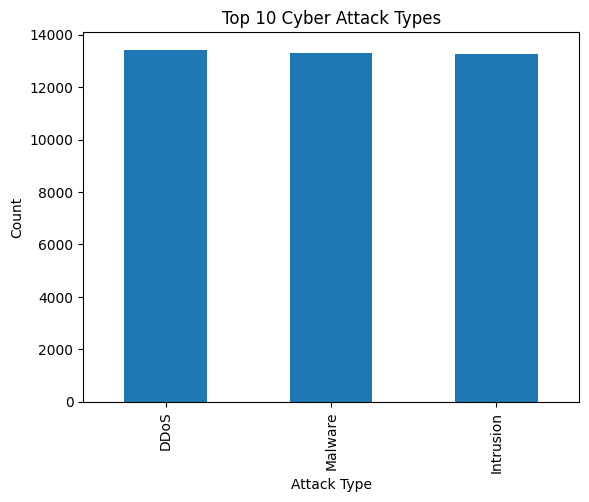

In [11]:
import matplotlib.pyplot as plt

df['attack_type'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Cyber Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()

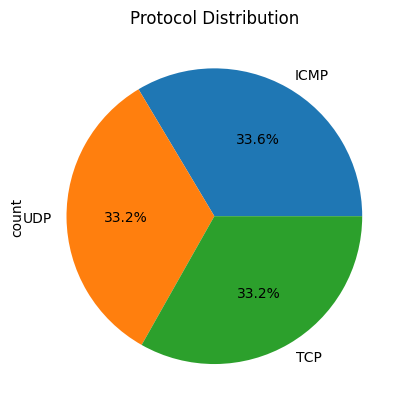

In [12]:
df['protocol'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Protocol Distribution")
plt.show()


Key Insights
DDoS attacks are most frequent
HTTP is the most targeted protocol
Conclusion
This analysis helps understand common cyber threats and can assist organizations in improving security measures.
